# Pymaceuticals Inc.
---

### Analysis

- The correlation coefficient and linear regression model demonstarates that the average tumor volume changes as the weight of the mice changes. 
Correlation between mouse weight and average tumor volume is 0.84, which is positive correlation. This also demonstrates that as the weight of the mice increaeses , so does the average tumor volume. 

- Capomulin and Ramicane seem to be the most effective drugs as their mean tumor volume's are the lowest between all other drugs, but both of these drugs had the most amount of mice tested so this may be skewing the data. This is demonstrated (for Capomulin) in the line plot. As the days (time point) increases, so does the tumor volume until around day 20, when the tumor volume took a massive drop and continued to drop through day 40. 
 
- The sex of the mouse does not seem to have an effect on the treatment across all drugs.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, on=("Mouse ID"))

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(pd.unique(combined_mouse_df['Mouse ID']))

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_mouse_df.loc[combined_mouse_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID']== 'g989', :]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_mouse_df.drop_duplicates(subset=['Mouse ID' , 'Timepoint'])
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_mouse_df.groupby('Drug Regimen').mean() ['Tumor Volume (mm3)']
tumor_median = clean_mouse_df.groupby('Drug Regimen').median() ['Tumor Volume (mm3)']
tumor_variance = clean_mouse_df.groupby('Drug Regimen').var() ['Tumor Volume (mm3)']
tumor_std = clean_mouse_df.groupby('Drug Regimen').std() ['Tumor Volume (mm3)']
tumor_sem = clean_mouse_df.groupby('Drug Regimen').sem() ['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame(data={"Mean Tumor Volume" : tumor_mean, "Median Tumor Volume" : tumor_median, 
                                  "Tumor Volume Variance" : tumor_variance, "Tumor Volume Std. Dev." : tumor_std, 
                                 "Tumor Volume Std. Err." : tumor_sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
clean_mouse_df.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

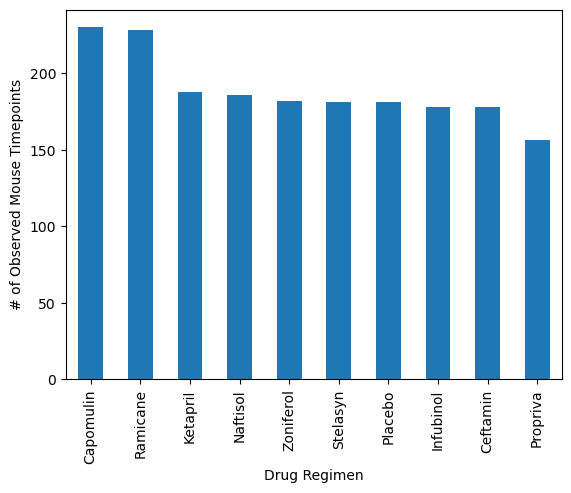

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

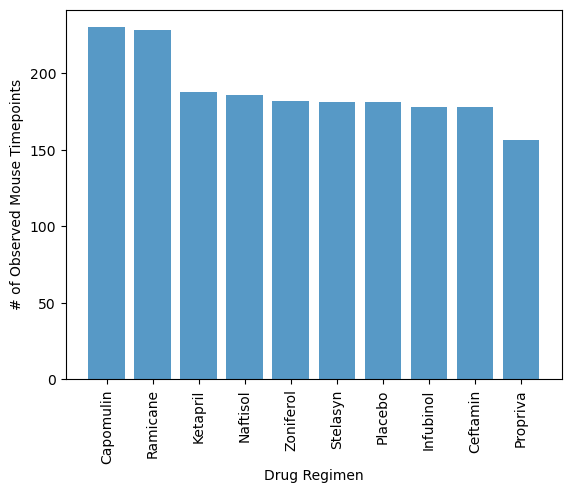

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = clean_mouse_df['Drug Regimen'].value_counts().to_dict()
plt.figure()
plt.bar(x=list(range(len(data))), alpha=.75, height= data.values(), tick_label= list(data.keys()))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

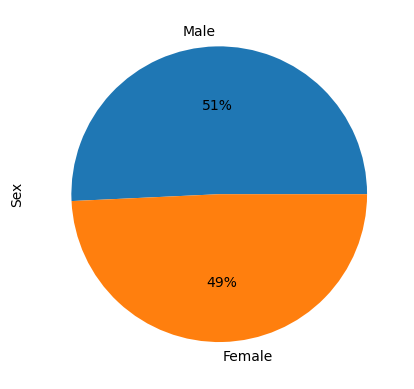

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_df["Sex"].value_counts().plot(kind="pie",autopct="%1.0f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

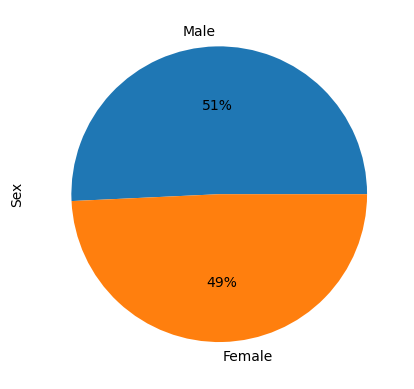

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_mouse_df["Sex"].value_counts(), labels= ["Male", "Female"] , autopct="%1.0f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_df[["Mouse ID","Tumor Volume (mm3)"]].loc[clean_mouse_df.groupby("Mouse ID").idxmax()["Timepoint"].values]
last_timepoint.rename(inplace= True , columns={"Tumor Volume (mm3)": "Tumor Vol Last Timepoint"})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_df = clean_mouse_df.merge(last_timepoint , on = "Mouse ID")
clean_mouse_df

C:\Users\chris\AppData\Local\Temp\ipykernel_5544\792589663.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  last_timepoint = clean_mouse_df[["Mouse ID","Tumor Volume (mm3)"]].loc[clean_mouse_df.groupby("Mouse ID").idxmax()["Timepoint"].values]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Vol Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878
...,...,...,...,...,...,...,...,...,...
1883,m601,25,33.118756,1,Capomulin,Male,22,17,28.430964
1884,m601,30,31.758275,1,Capomulin,Male,22,17,28.430964
1885,m601,35,30.834357,1,Capomulin,Male,22,17,28.430964
1886,m601,40,31.378045,1,Capomulin,Male,22,17,28.430964


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in drugs: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = clean_mouse_df[clean_mouse_df["Drug Regimen"] == name]["Tumor Vol Last Timepoint"]
    tumor_vol_data.append(data.to_numpy())
    
    # add subset 
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1 

   
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    # Determine outliers using upper and lower bounds
    
    filter = (data > lb) & (data < ub)
    #print(data[~filter])
    print(name, "'s potential outliers: " , data[~data.isin([lb , ub])])

Capomulin 's potential outliers:  0       38.982878
1       38.982878
2       38.982878
3       38.982878
4       38.982878
          ...    
1883    28.430964
1884    28.430964
1885    28.430964
1886    28.430964
1887    28.430964
Name: Tumor Vol Last Timepoint, Length: 230, dtype: float64
Ramicane 's potential outliers:  436     38.342008
437     38.342008
438     38.342008
439     38.342008
440     38.342008
          ...    
1660    36.374510
1661    36.374510
1662    36.374510
1663    36.374510
1664    36.374510
Name: Tumor Vol Last Timepoint, Length: 228, dtype: float64
Infubinol 's potential outliers:  213     36.321346
214     36.321346
215     72.226731
216     72.226731
217     72.226731
          ...    
1650    60.918767
1651    60.918767
1652    60.918767
1653    60.918767
1654    60.918767
Name: Tumor Vol Last Timepoint, Length: 178, dtype: float64
Ceftamin 's potential outliers:  1299    61.386660
1300    61.386660
1301    61.386660
1302    61.386660
1303    61.386660
  

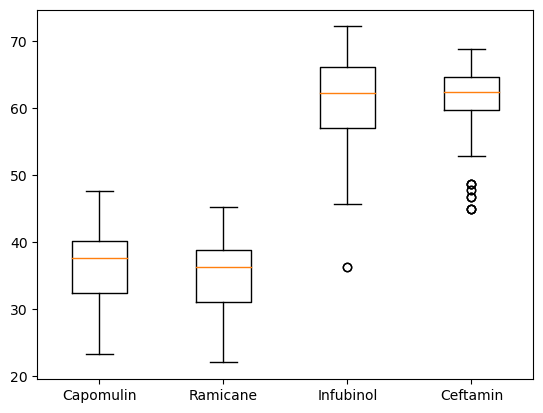

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks(ticks=list(range(1,len(drugs)+1)), labels=drugs)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

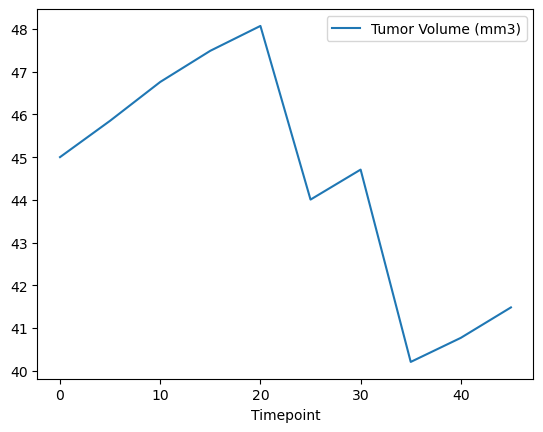

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_mouse_df[clean_mouse_df["Mouse ID"]=="l509"].plot(x = "Timepoint", y= "Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume')

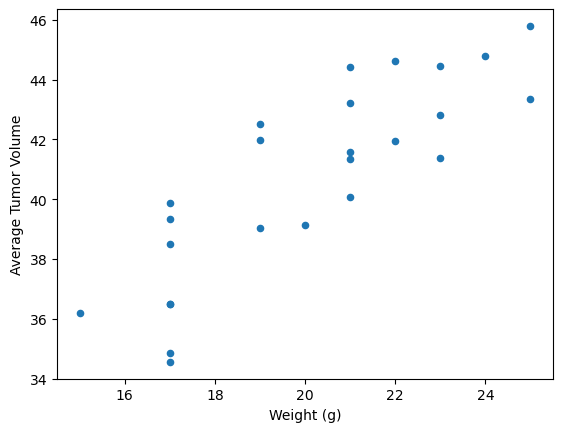

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
clean_mouse_df[clean_mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean().plot(kind="scatter", x= "Weight (g)" , y= "Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume')

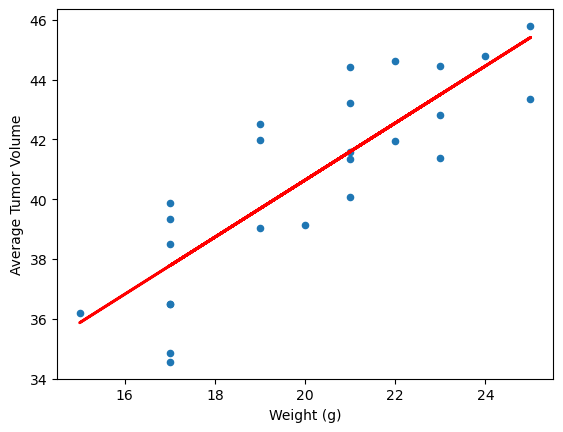

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = clean_mouse_df[clean_mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]].corr().to_numpy()[0,1] 
print("The correlation between mouse weight and the average tumor volume is {:.2f}".format(corr_coeff))

clean_mouse_df[clean_mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean().plot(kind="scatter", x= "Weight (g)" , y= "Tumor Volume (mm3)")
x = clean_mouse_df[clean_mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean()["Weight (g)"].to_numpy()
y = clean_mouse_df[clean_mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean()["Tumor Volume (mm3)"].to_numpy()
result= st.linregress(x,y)
plt.plot(x, result.slope * x + result.intercept, color ="red", lw= 2)
plt.ylabel("Average Tumor Volume")